# **Study "Online Shoppers Purchasing Intention" using Decision Tree Classifier**

# Context:

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data.
This is a transnational data set which contains all the transactions occurring online retail.
Ecommerce data is information relating to the visitors and performance of an online shop. It's mostly used by marketers e.g. in understanding consumer behavior and enhancing conversion funnels.

# Objective:

The objective is to find out the features which have the most information context to differentiate the positive class and negative class and also build a model to predict whether a customer will buy a product or not.

# Data Description:

- Out of the 12,330 customer samples in the dataset, 84.5% (10,422) were negative class samples (i.e. customers who did not end up buying the product), and the rest (1908) were positive class samples (i.e. customers who ended up buying).
- The dataset consists of 10 numerical and 8 categorical attributes.
- The 'Revenue' attribute can be used as the class label.

--------------------------------------
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration": These represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
- The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
--------------------------------------
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
- **Bounce Rate:** The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
- **Exit Rate:** The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

Read more about **Bounce Rate** vs **Exit Rate** [here](https://support.google.com/analytics/answer/2525491?hl=en&ref_topic=6156780)
- **Page Value:** The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

Read more about **Page Value** [here](https://support.google.com/analytics/answer/2695658?hl=en).

--------------------------------------
- **Special Day:** The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.
- The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
- For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
--------------------------------------
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

------------------------
# Concepts to Cover
------------------------
- 1. <a href = #link1>Overview of the data</a>
- 2. <a href = #link2>Data Visualization</a>
- 3. <a href = #link3>Data Preparation</a>
- 4. <a href = #link4>Choose Model, Train and Evaluate</a>
- 5. <a href = #link5>Visualization of Decision Tree</a>
- 6. <a href = #link6>Conclusion</a>

# Let's Start Coding!

In [ ]:
# Import necessary libraries.
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [ ]:
data = pd.read_csv('online_shoppers_intention.csv')                    # Load the dataset, provide the suitable folder path to dataset in it.

# <a id='link1'>Overview of the data</a>

In [ ]:
data.head()                                                                     # Check the first 5 rows of dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.shape                                                                      # Check the shape of the dataset.

(12330, 18)

- The above output is a tuple: (rows, columns).
- This means that, number of rows=12330 and number of columns=18.

### Let's check the duplicate data. And if any, we should remove it.

In [ ]:
data[data.duplicated()].count()

Administrative             125
Administrative_Duration    125
Informational              125
Informational_Duration     125
ProductRelated             125
ProductRelated_Duration    125
BounceRates                125
ExitRates                  125
PageValues                 125
SpecialDay                 125
Month                      125
OperatingSystems           125
Browser                    125
Region                     125
TrafficType                125
VisitorType                125
Weekend                    125
Revenue                    125
dtype: int64

### Let's drop the duplicate values. As we can see from above that 125 are duplicates.

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()                                                                     # Check information about data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

### Insights:

- We can see that all the entries in data are non-null. Means no missing values.
- Most of the data-types are either **int64** or **float64**.
- 2 columns are having data-types as **object**, this means we need to convert these into suitable data-type before we feed our data into the model.
- Last two columns: "Weekend" and "Revenue", have the data-type as **bool**.

### Think about it:

- We already know that we convert the categorical data-types into suitable form using either the "LabelEncoder" or "OneHotEncoding".
- But here we have **bool** data type. What should we do here?
- In Python, True and False are cast implicitly into integers:

    `True == 1`
    
    `False == 0`
    
    This means that an algorithm running in pure Python should work without conversion.

In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12205,NaN,NaN,NaN,2.33888,3.33044,0,0,1,4,27
Administrative_Duration,12205,NaN,NaN,NaN,81.6463,177.492,0,0,9,94.7,3398.75
Informational,12205,NaN,NaN,NaN,0.508726,1.27562,0,0,0,0,24
Informational_Duration,12205,NaN,NaN,NaN,34.8255,141.425,0,0,0,0,2549.38
ProductRelated,12205,NaN,NaN,NaN,32.0456,44.5936,0,8,18,38,705
ProductRelated_Duration,12205,NaN,NaN,NaN,1206.98,1919.6,0,193,608.943,1477.15,63973.5
BounceRates,12205,NaN,NaN,NaN,0.0203703,0.0452554,0,0,0.00289855,0.0166667,0.2
ExitRates,12205,NaN,NaN,NaN,0.0414656,0.0461627,0,0.014231,0.025,0.0485294,0.2
PageValues,12205,NaN,NaN,NaN,5.94957,18.6537,0,0,0,0,361.764
SpecialDay,12205,NaN,NaN,NaN,0.0619418,0.199666,0,0,0,0,1


- The above code is used to Generate descriptive statistics.

- Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

# <a id='link2'>Data Visualization</a>

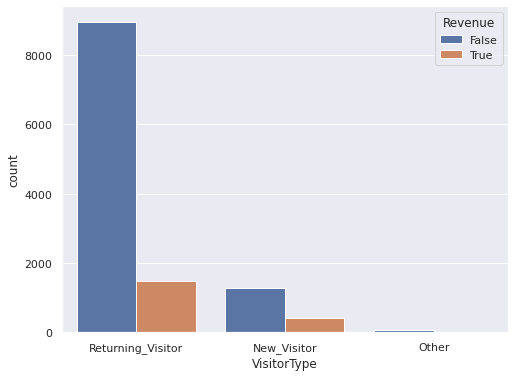

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(data=data, x='VisitorType', hue='Revenue')

### Insights:

- It's clear that the number of False (Customers who didn't purchase) is more than number of True(Customers who purchased) in both types of visitors: Returning_Visitor and New_Visitor.

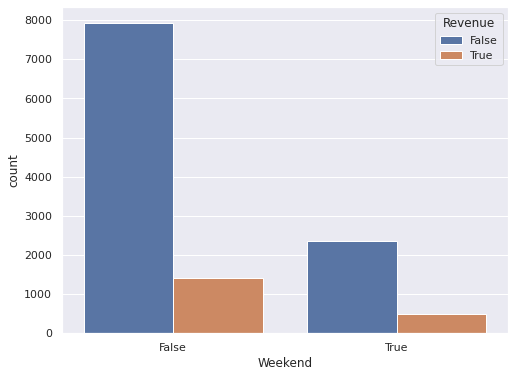

In [ ]:
sns.countplot(data=data,x='Weekend',hue='Revenue')

### Insights:

- Weekend sales are also comparatively good as compared to the other weekdays combined.

### Let's see the correlation between various features:

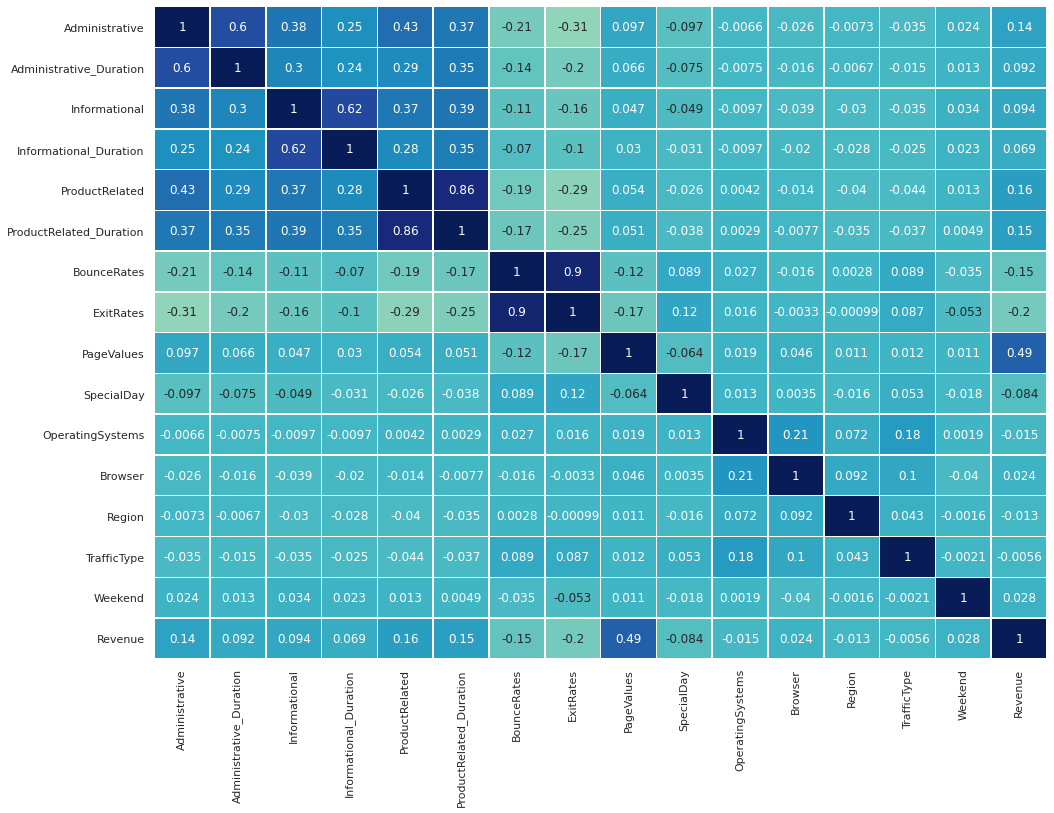

In [ ]:
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

### Insights:

- There is significant correlation between the target variable "Revenue" and the feature "PageValues".
- "Administrative" and "Administrative_Duration" also have high correlation (0.6)

Observe the plot closely and see other than above insight, what else can you find?

- As the feature "Month" needs to be converted into suitable data-type, let's see what is the distribution of customer counts in different months.

In [ ]:
data['Month'].value_counts(normalize=True)

May     0.272757
Nov     0.244326
Mar     0.152397
Dec     0.139779
Oct     0.044982
Sep     0.036706
Aug     0.035477
Jul     0.035395
June    0.023351
Feb     0.014830
Name: Month, dtype: float64

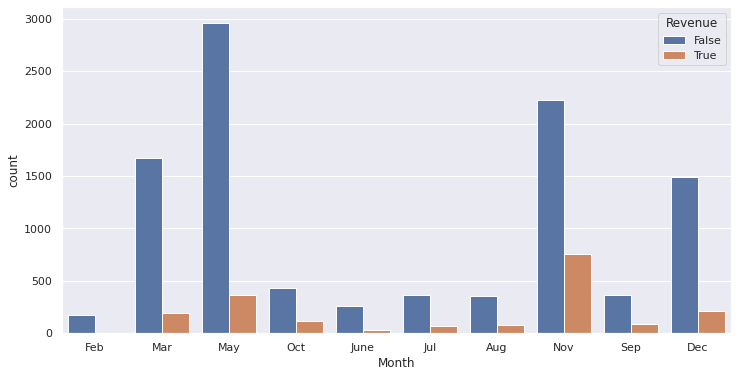

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data=data,x='Month',hue='Revenue')

### Insights:

- Sales are higher in months like March, May, November or December.
- November has higher ratio of conversion (Customers are more likely to purchase).

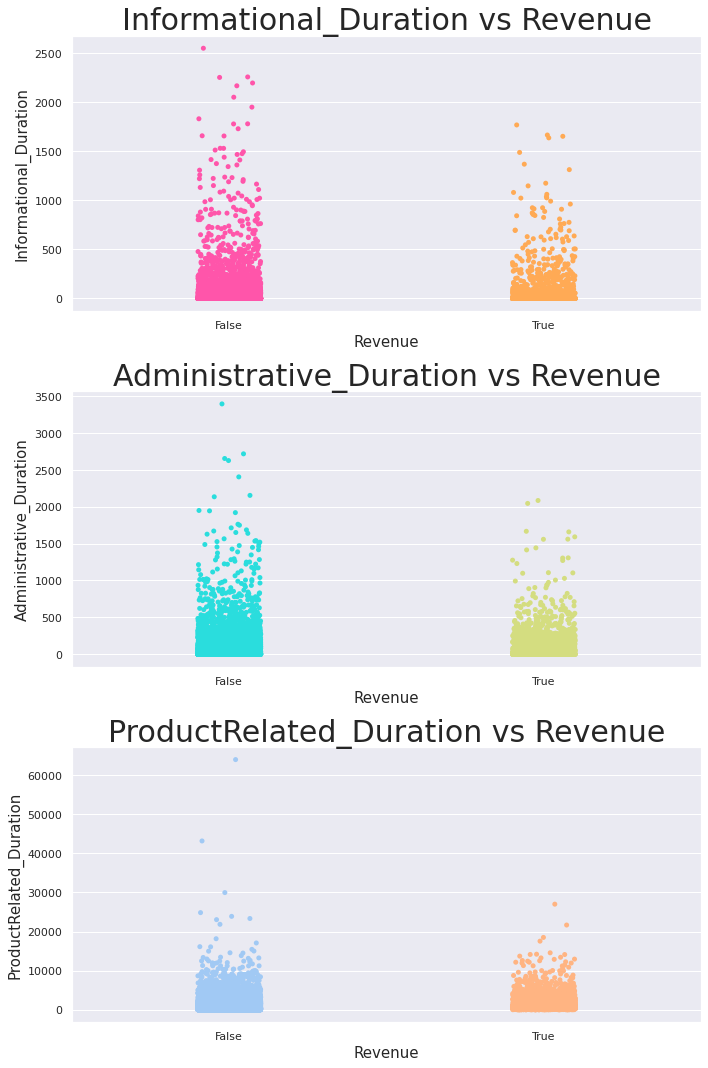

In [ ]:
plt.rcParams['figure.figsize'] = (10, 15)

labels = ['Informational_Duration', 'Administrative_Duration', 'ProductRelated_Duration']
palettes = ['spring', 'rainbow', 'pastel']
for index, label in enumerate(labels):
    plt.subplot(3, 1, index+1)
    sns.stripplot(x=data['Revenue'], y=data[label], palette = palettes[index])
    title = label + ' vs Revenue' 
    plt.title(title, fontsize = 30)
    plt.ylabel(label, fontsize = 15)
    plt.xlabel('Revenue', fontsize = 15)
    plt.tight_layout()

### Insights:

- We can see that values of different durations are concentrated at lower portion of the graph for Revenue=False and has some outliers too.
- At the same time point, Revenue=True has lower number of ouliers comparatively.
- If this is not evident from the graph, you can use different jitter values to see the same.

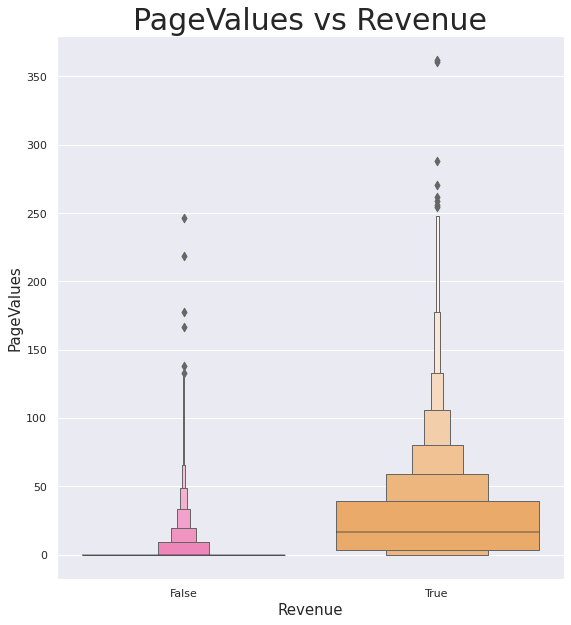

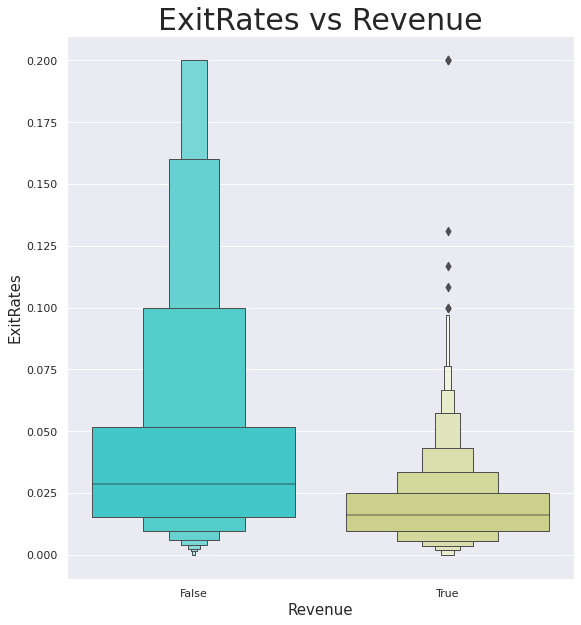

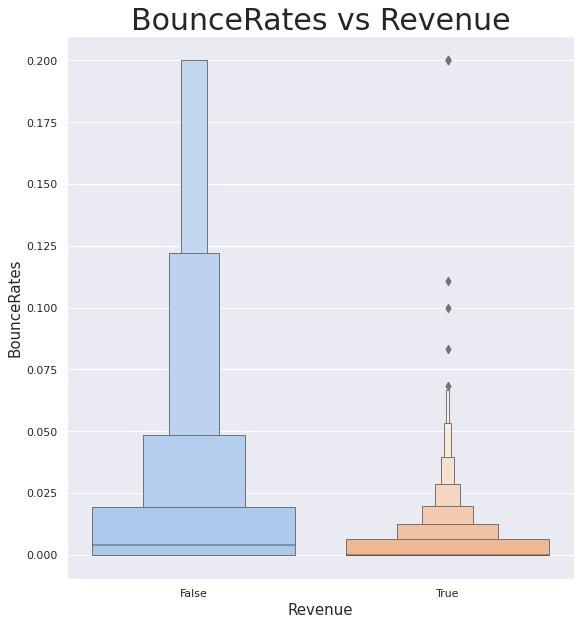

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
labels = ['PageValues', 'ExitRates', 'BounceRates']
palettes = ['spring', 'rainbow', 'pastel']

for index, label in enumerate(labels):
    plt.subplot(1, 2, 1)
    sns.boxenplot(x=data['Revenue'], y=data[label], palette = palettes[index])
    title = label + ' vs Revenue' 
    plt.title(title, fontsize = 30)
    plt.ylabel(label, fontsize = 15)
    plt.xlabel('Revenue', fontsize = 15)
    plt.show()

### Insights:

- Boxenplpots are similar to a box plot in plotting a nonparametric representation of a distribution. By plotting more quantiles, it provides more information about 
the shape of the distribution, particularly in the tails.
- We can see that, Revenue=True has larger values, for Page Values, in the second quantile and each corresponsing quantile has more values as compared to Revenue=False.
- On the other hand, the case is opposite for Exit Rates and Bounce Rates.

###  We can use pd.groupby(‘Revenue’).mean() and see a significant difference between two classes in terms of time spent on the website or bounce rates etc.

In [ ]:
grouped = data.groupby(by='Revenue')

In [ ]:
grouped.mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Revenue,,,,,,,,,,,,,,,
False,2.143440,74.635276,0.457318,30.603289,29.050403,1082.976881,0.023197,0.045526,1.999985,0.069127,2.130038,2.340099,3.166456,4.083617,0.229193
True,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488,0.261530


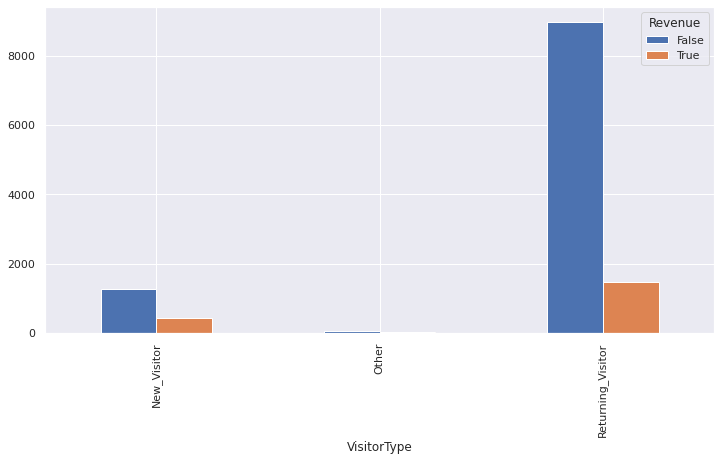

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
pd.crosstab(data.VisitorType, data.Revenue).plot(kind='bar');

In [ ]:
pd.crosstab(data.Weekend,data.Revenue,normalize='columns')

Revenue,False,True
Weekend,,
False,0.770807,0.73847
True,0.229193,0.26153


In [ ]:
data['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

In [ ]:
index = data[data['VisitorType']=='Other'].index

In [ ]:
data.drop(index=index,axis=0,inplace=True)

In [ ]:
data.VisitorType.value_counts()

Returning_Visitor    10431
New_Visitor           1693
Name: VisitorType, dtype: int64

# <a id='link3'>Data Preparation</a>

### Conversion of features using LabelEncoder:

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# data['Month'] = le.fit_transform(data['Month'])
# data['VisitorType'] = le.fit_transform(data['VisitorType'])

data = pd.get_dummies(data, columns=['Month', 'VisitorType'])

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
column_names = list(data.columns)
column_names.remove('Revenue')                     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor']


- We can see that the names of months in the column "Month" are converted into numbers.
- Also, the Names of VisitorType is converted into number.

In [ ]:
X = data.drop('Revenue',axis=1)                                                 # Features
y = data['Revenue']                                                             # Labels (Target Variable)

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(8486, 27) (3638, 27)


In [ ]:
y_train.value_counts()

False    7162
True     1324
Name: Revenue, dtype: int64

# <a id='link4'>Choose Model, Train and Evaluate</a>

In [ ]:
model_gini = DecisionTreeClassifier(criterion='gini')

- The above step is a decision tree classifier which has a function to measure the quality of a split using the criterian as “gini”(for the Gini impurity.)
- There are two criterian, “gini” for the Gini impurity and “entropy” for the information gain.

In [ ]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model_gini.score(X_train, y_train)  # performance on train data

1.0

In [ ]:
model_gini.score(X_test, y_test)  # performance on test data

0.8512919186366136

- The performance on training data is 1 while for test data, it's 0.85. Hence the model is a overfit.
- As we chose to build the decision tree till the last split, the model is overfit hence not performing well on the test (unseen) data.

In [ ]:
predictions = model_gini.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8512919186366136


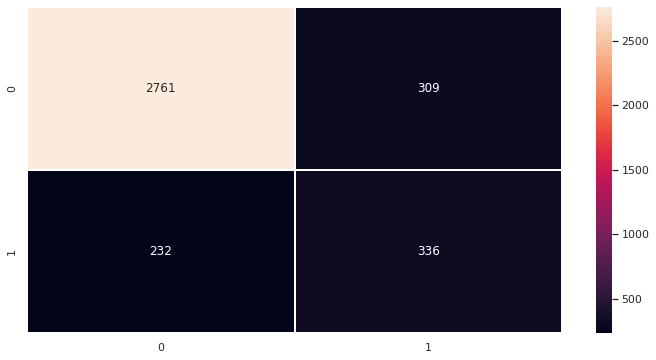

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

### Insights:

Let's make the following definitions:

- "True" is a positive class.
- "False" is a negative class.


- **True Positives:**
    - Reality: A customer made purchase.
    - Model predicted: The customer will contribute to revenue.
    - Outcome: Model is good.

- **True Negatives:**
    - Reality: A customer did NOT made purchase.
    - Model predicted: The customer will NOT contribute to revenue.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT made purchase.
    - Model predicted: The customer will contribute to revenue.
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be contributing to the revenue.

- **False Negatives:**
    - Reality: A customer made purchase.
    - Model predicted: The customer will NOT contribute to revenue.
    - Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some discount or loyalty card to make the customer come again to purchase. (Customer retention will get affected.)

Now, let's try to prune the tree using some other hyperparameters that will give more appropriate result.


- We are using a different set of hyperparameters, which will build the decision tree upto a certain depth (in our case the max_depth is 5.)

- You can read more about hyperparameters of DecisionTreeClassifier from [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

# Add on:

- **GridSearchCV** can be used to find the optimal choice of hyperparameters among a set of hyperparameters we provide in that function.
- You can read more about it from [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [here](https://www.geeksforgeeks.org/hyperparameter-tuning/)

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=20, min_samples_split=150)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.score(X_train, y_train)

0.911029931652133

In [ ]:
print(classification_report(predictions, y_test))

In [ ]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8969213853765805


### Think about it:

- After pruning, the accuracy score for training score is reduced from 100% to ~90%. But at the same time, we see that there is increase in accuracy for test dataset, i.e. accuracy increased from 85% to 89.4%.
- Why is this happening?


### Pruning:

- Tree pruning is performed in order to remove anomalies in the training data due to noise or outliers. The pruned trees are smaller and less complex.
- As the anamolies due to noise is removed, the ability of model to perform better on the unseen (test) data is increased.

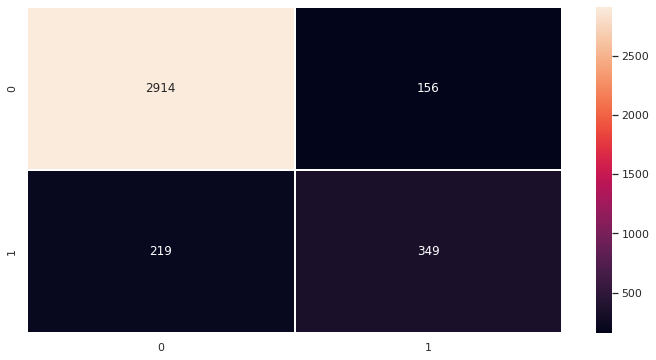

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

### Insights:

Let's make the following definitions:

- "True" is a positive class.
- "False" is a negative class.


- **True Positives:**
    - Reality: A customer made purchase.
    - Model predicted: The customer will contribute to revenue.
    - Outcome: Model is good.

- **True Negatives:**
    - Reality: A customer did NOT made purchase.
    - Model predicted: The customer will NOT contribute to revenue.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT made purchase.
    - Model predicted: The customer will contribute to revenue.
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be contributing to the revenue.

- **False Negatives:**
    - Reality: A customer made purchase.
    - Model predicted: The customer will NOT contribute to revenue.
    - Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some discount or loyalty card to make the customer come again to purchase. (Customer retention will get affected.)

In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3133
        True       0.61      0.69      0.65       505

    accuracy                           0.90      3638
   macro avg       0.78      0.81      0.80      3638
weighted avg       0.90      0.90      0.90      3638



### Insights:

- If we compare this classification report with the previous one. We see that there is an increase in F1-Score for both classes: False and True.
- Also, overall F1-Score is also more this time.

# <a id='link5'>Visualization of Decision Tree</a>

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


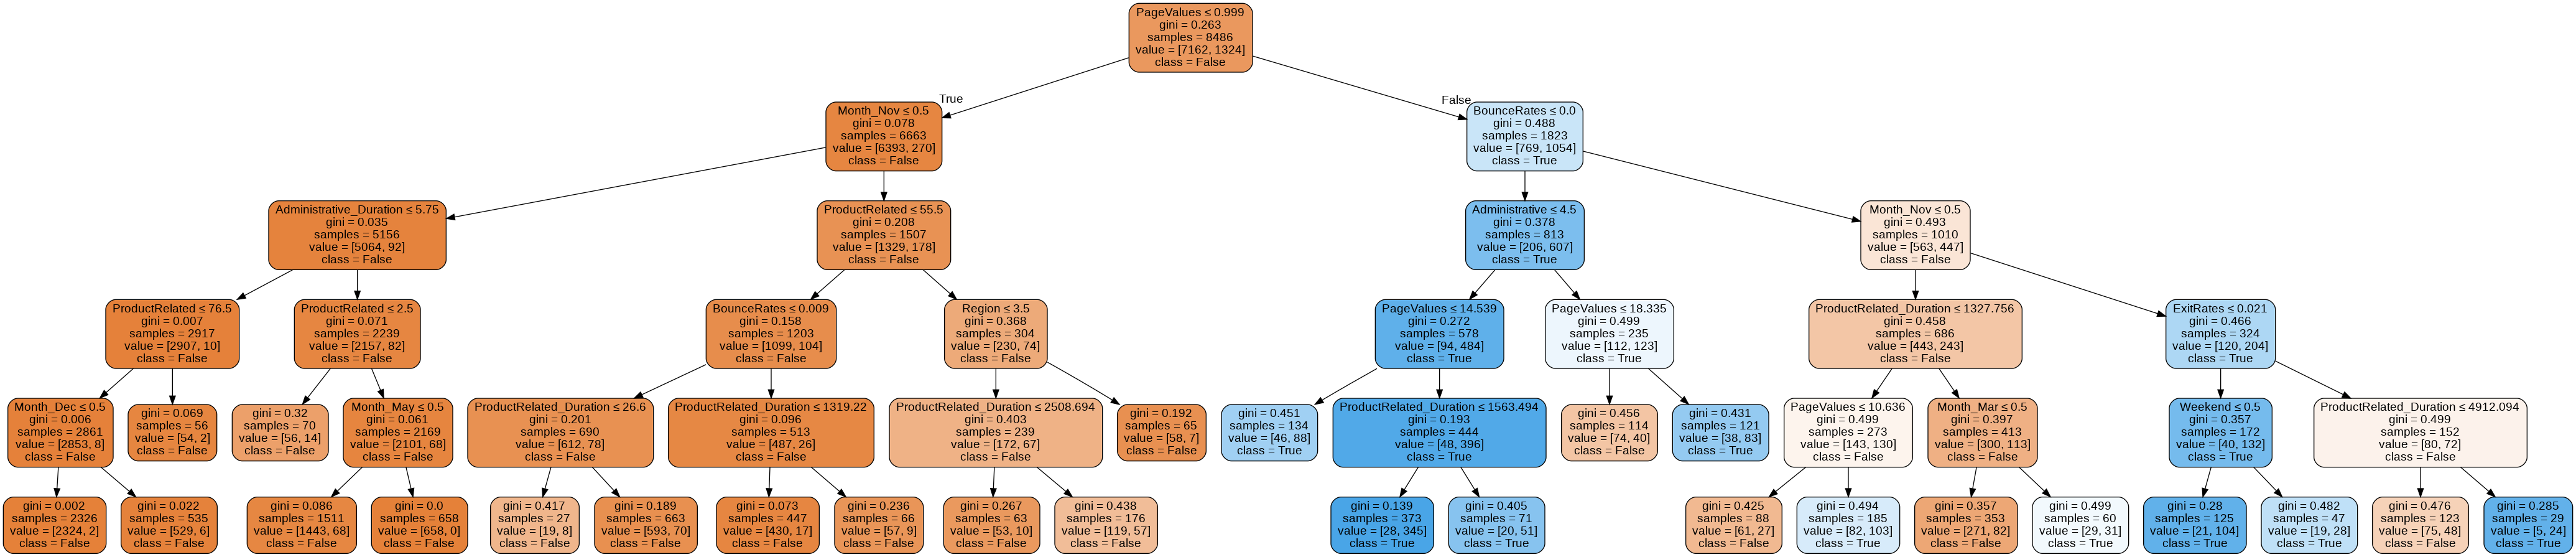

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_names,
                class_names=['False', 'True'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('data.png')
Image(graph.create_png())

- The above tree is large, so let's create a new tree which is small so we are able to see it easily.

In [ ]:
clf_pruned = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

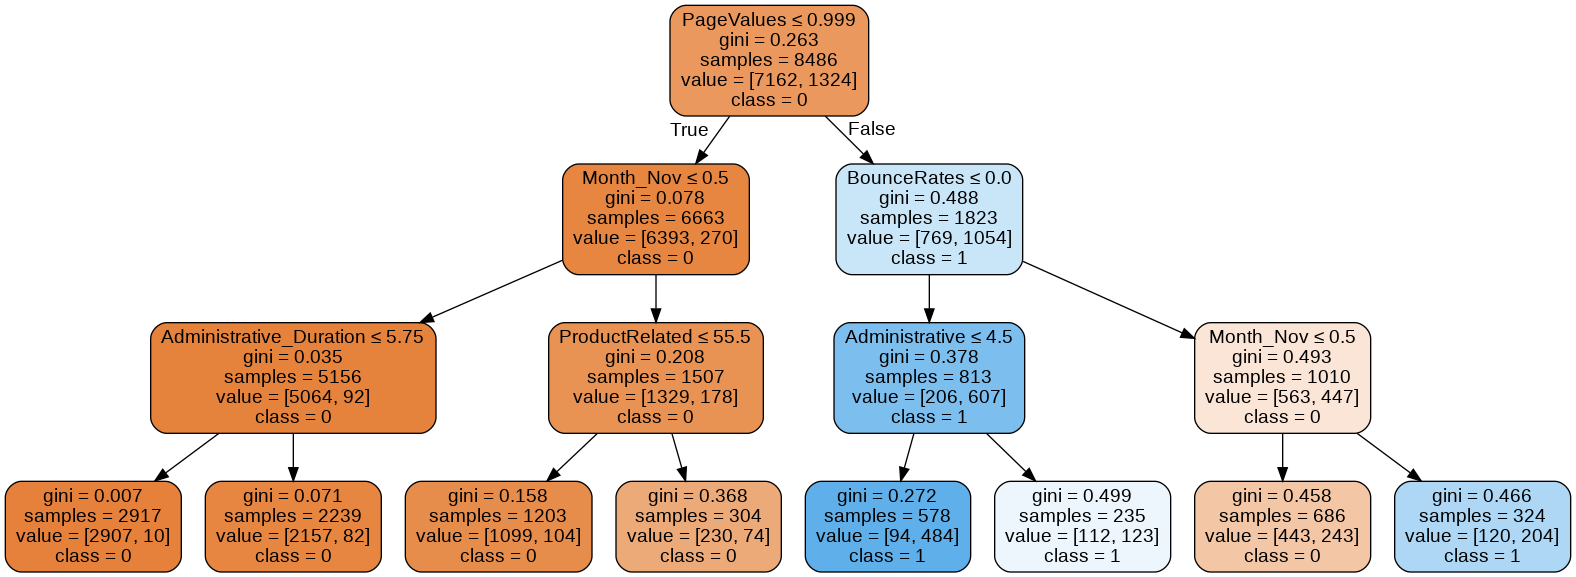

In [ ]:
dot_data = StringIO()
export_graphviz(clf_pruned,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_names,
                class_names=['0','1']
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('clf_pruned.png')
Image(graph.create_png())

# Insights:

- This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

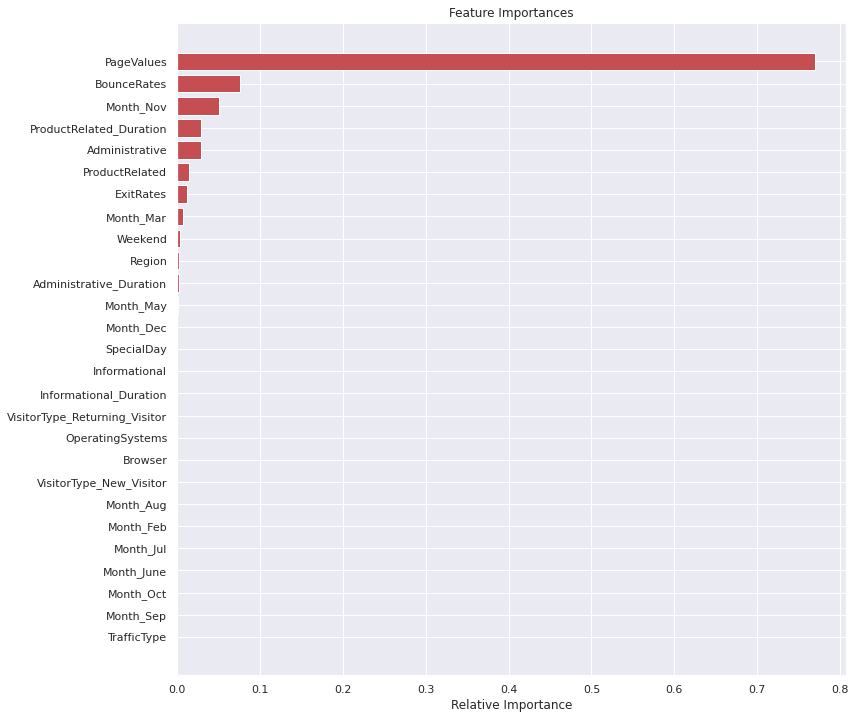

In [ ]:
# Understanding Feature Importance
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights:

- As you can see from the root of the decision tree, **PageValue** feature gives the most information context to differentiate the **True** and **False** classes.
- This is clearly seen in the feature importance value as well.
- "Informational" and "Weekend" feature adds very small value for the prediction.
- We can make one more model using top features (using feature_importance_), we can even eliminate the features below the ‘Month_May’ variable and show that the accuracy is almost unaffected.

# <a id='link6'>Conclusion</a>

- We analysed the "Online Shoppers Purchasing Intention" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model we built at the end can be used to predict if a customer is going to contribute for Revenue generation (by purchasing) or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- We established the importance of hyper-parameters/ pruning to reduce overfitting.


# **Inferences:**

- Proportion of customers who are buying is higher in first time users than in the returning users.
- Customers, who are spending higher time on website, are not buying.

# **Recommendations:**

- Customer Retention - Member Loyalty programs initiative. Provide coupons after the first purchase.
- Browsing Customers - Employ the predictive model to predict potential customers (customers who can acutally buy the product), Offer limited time coupons/discounts on a real-time basis only to those customers. This can also be employed for the customers in the months like March, May, November and December, as in those months, the traffic is higher so these months have potential buying users.
- Site Engagement - Version of the site for slower-internet users, Consistent and user-friendly mobile website design.

# Appendix:

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **sklearn.preprocessing.LabelEncoder** : Encode target labels with value between 0 and n_classes-1.

- **[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**

- **graphviz** : This package facilitates the creation and rendering of graph descriptions in the DOT language of the Graphviz graph drawing software (master repo) from Python.